## Import

In [1]:
import torch

In [2]:
from src.utils.inference import Inference
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch

In [3]:
SRC_PATH = "data/public_test_data/new_public_test"
MODEL_PATH = "C:/Users/vodin/Downloads/__output__ (1)/model_swin_transformer_v2_200.pt_best"

## Predict

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
infer = Inference(MODEL_PATH  = MODEL_PATH,device=device)

{'transformer': {'embed_size': 384, 'num_heads': 8, 'num_layers': 4, 'max_len': 320, 'dropout': 0.1, 'bias': False, 'embed_type': 'position'}, 'encoder': {'type': 'swin_transformer_v2', 'swin': {'patch_size': [4, 4], 'embed_dim': 96, 'window_size': [8, 8], 'dropout': 0.1, 'depths': [2, 6, 2], 'num_heads': [6, 12, 24]}}, 'decoder': {'type': 'transformer'}, 'scheduler': {'active': True, 'first_cycle_steps': 1600, 'cycle_mult': 1, 'max_lr': 0.0005, 'min_lr': 3e-05, 'warmup_steps': 160, 'gamma': 0.99}, 'dataloader': {'num_workers': 0, 'type': 'normal'}, 'img_size': [64, 256], 'lr': 0.0001, 'label_smoothing': 0.1, 'max_grad_norm': 0.5, 'batch_size': 64, 'num_epochs': 200, 'save_per_epochs': 1, 'print_type': 'per_epoch', 'seed': 0}


| Evaluating: [###################]  100.00% | ETA:     0.0s | Done!
{'public_test_img_1020.jpg': 'Dênh'}


c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torch\nn\modules\activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\attention.cpp:152.)
  return torch._native_multi_head_attention(


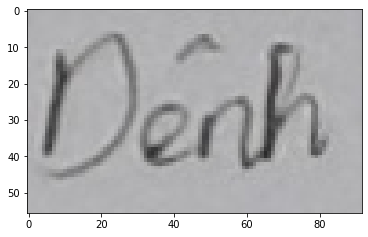

In [6]:
idx = torch.randint(1000,())
img = Image.open(os.path.join(SRC_PATH,os.listdir(SRC_PATH)[idx]))
infer.model.eval()
print(infer.predict(SRC_PATH,[os.listdir(SRC_PATH)[idx]]))
plt.imshow(img)

In [7]:
from datetime import datetime
date = datetime.now().strftime('%Y-%m-%d-%Hh-%Mp-%Ss')

In [8]:
date

'2023-09-13-10h-47p-08s'

In [9]:
pred = infer.predict(SRC_PATH,os.listdir(SRC_PATH),batch_size=200,save=True,save_dir=f'data/predict/{date}')

| Evaluating: [###################]  100.00% | ETA:     0.0s | Done!
Prediction save to: data/predict/2023-09-13-10h-47p-08s/prediction.txt


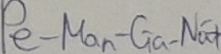

In [10]:
Image.open(os.path.join(SRC_PATH,"public_test_img_13054.jpg"))

In [11]:
len(os.listdir("C:/Users/vodin/project-DD/data/public_test_data/new_public_test"))

33000

In [12]:
with open("C:/Users/vodin/project-DD/data/predict/2023-09-13-10h-32p-41s/prediction.txt","r") as f:
    data = f.read()

In [13]:
list_dir = os.listdir("C:/Users/vodin/project-DD/data/public_test_data/new_public_test")
for k in pred.keys():
    if k not in list_dir:
        print(k)
    else:
        print("-",end="")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------